In [6]:
# Digitize the Vs model from the Oman active seismic experiment

## Import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from color_manipulation import rgb_to_scalar
import cv2
from os.path import join

In [12]:
## Define the image path
path_cb = "/Volumes/OmanData/geophones_no_prefilt/data/OmanVsColorBar.png"
path_mod = "/Volumes/OmanData/geophones_no_prefilt/data/OmanVsModel.png"

## Velocity limits
velmin = 210
velmax = 1600

## Depth limits
depmin = 0
depmax = 30

## Number of rows to remove from the top of the velocity model
nrows = 2

In [8]:
## Load the image of the color bar
image = cv2.imread(path_cb)

## Convert BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Average the color bar over the vertical direction
colors = np.mean(image, axis=0)
numcolors = colors.shape[0]

positions = range(numcolors)

# Build the color dictionary
color_dict = {}
for position, color in zip(positions, colors):
    color_dict[position] = color


In [9]:
## Load the image of the Vs model
image = cv2.imread(path_mod)

## Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## Remove the top rows
image_rgb = image_rgb[nrows:, :, :]

## Find the nearest color for each pixel
image_sca = rgb_to_scalar(image_rgb, color_dict)

## Convert to velocity
image_vel = velmin + (velmax - velmin) * image_sca / np.max(positions)


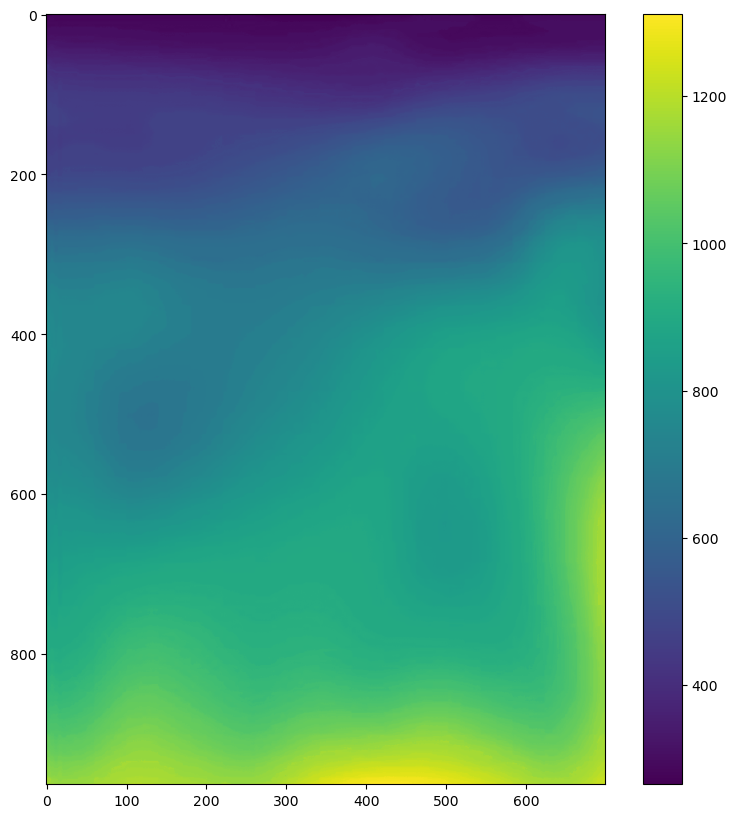

In [10]:
# ## Plot the image  
# plt.figure(figsize=(10, 10))
# plt.imshow(image_vel, cmap='viridis')
# plt.colorbar()

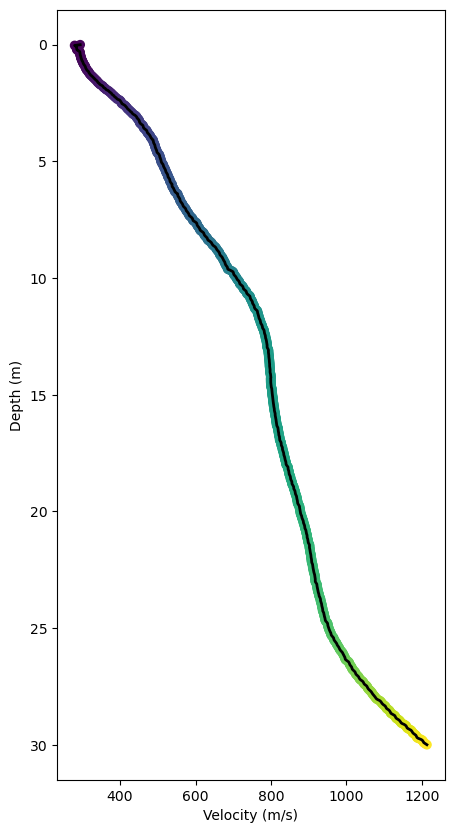

In [16]:
## Extract the average 1D velocity
vel_avg = np.mean(image_vel, axis=1)
numvel = len(vel_avg)
depax = np.linspace(depmin, depmax, numvel)

## Plot the average velocity
plt.figure(figsize=(5, 10))
plt.plot(vel_avg, depax, 'k', linewidth=2)
plt.scatter(vel_avg, depax, c=vel_avg, cmap='viridis')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Depth (m)')
plt.gca().invert_yaxis()


In [ ]:
## Save the average velocity
outdir = "/Volumes/OmanData/geophones_no_prefilt/data/"
outpath = join(outdir, "OmanVsModel.dat")
np.savetxt(outpath, np.vstack((depax, vel_avg)).T, fmt='%.2f')